# EE379K Lab4
## Irfan Hasan (ih3976), Peter Zhang (yz7734)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread

# Question 1 (Peter)

## Part 1

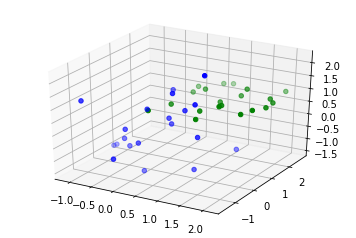

In [72]:
mean1 = [0, 0, 0]
cov1 = [[0.5, 0, 0], [0, 0.5, 0], [0, 0, 0.7]]
label1 = np.random.multivariate_normal(mean1, cov1, 20)


mean2 = [1, 1, 1]
cov2 = [[0.5, 0, 0], [0, 0.5, 0], [0, 0, 0.01]]
label2 = np.random.multivariate_normal(mean2, cov2, 20)

x1, y1, z1 = label1.T
x2, y2, z2 = label2.T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, y1, z1, c='b', label='1')
ax.scatter(x2, y2, z2, c='g', label='2')
plt.show()

## Part 2

Most of the points scattered within an invisible boundry with a few points outside it.

## Part 3

In [77]:
X = np.concatenate((label1, label2))

rows = X.shape[0]
ones = np.ones((rows, rows))
mean = np.divide(np.dot(ones, X), rows)
dif = np.subtract(X, mean)
covX = np.divide(np.dot(dif.T, dif), (rows-1))

print "Calculated covariance matrix:"
print covX
print
print "Build-in covariance matrix:"
print np.cov(X, rowvar = False)

Calculated covariance matrix:
[[ 0.72486621  0.45302207  0.32186617]
 [ 0.45302207  0.95637096  0.35943222]
 [ 0.32186617  0.35943222  0.71406914]]

Build-in covariance matrix:
[[ 0.72486621  0.45302207  0.32186617]
 [ 0.45302207  0.95637096  0.35943222]
 [ 0.32186617  0.35943222  0.71406914]]


## Part 4

In [74]:
w, v = np.linalg.eig(covX)
w, v

(array([ 1.57695108,  0.36237742,  0.4559778 ]),
 array([[ 0.54627539,  0.8373531 , -0.02056655],
        [ 0.68112838, -0.4583796 , -0.5709223 ],
        [ 0.48749085, -0.29787234,  0.82074645]]))

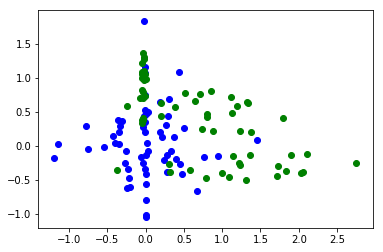

In [78]:
# (p.*v)./(v.*v)*v
def project_to_vector(p, v):
    return np.dot(np.divide(np.dot(p,v), np.dot(v,v)), v)

# EDIT THIS WHEN RECOMPILING
v1 = v[0]
v2 = v[2]

new_x1 = []
new_y1 = []
new_x2 = []
new_y2 = []
for i in range(20):
    new_x1.append(project_to_vector(label1[i], v1))
    new_y1.append(project_to_vector(label1[i], v2))
    new_x2.append(project_to_vector(label2[i], v1))
    new_y2.append(project_to_vector(label2[i], v2))
    
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(new_x1, new_y1, c='b', label='1')
ax.scatter(new_x2, new_y2, c='g', label='2')
plt.show()

PCA made it easier to distinguish the difference between two sets of data.

# Question 2 (Peter)

## Part 1

In [21]:
def rank_approx(n, u, s, v):
    x = u.shape[0]
    y = v.shape[0]
    
    s = np.array(s)
    s[n:] = 0
    
    img = np.zeros((x,y))
    img[:y, :y] = np.diag(s)
    rank = np.matmul(np.matmul(u, img), v)
    plt.imshow(rank, cmap='Greys_r')
    plt.show()

mona = imread('mona_lisa.png', flatten=True)
u, s, v = np.linalg.svd(mona)

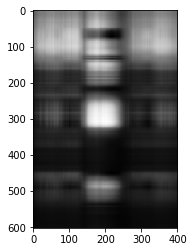

In [22]:
rank_approx(2, u, s, v)

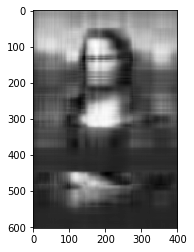

In [24]:
rank_approx(5, u, s, v)

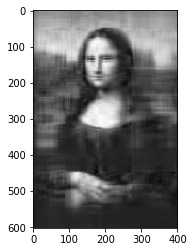

In [25]:
rank_approx(10, u, s, v)

Original picture has K bits, which is 603 * 400 * 16 = 3,859,200 bits <br>
2 rank: K * (2 / 400) = 19296 bits<br>
5 rank: K * (5 / 400) = 48240 bits<br>
10 rank: K * (10 / 400) = 96480 bits<br>

# Question 3

Using PCA we can reduce the matrices to 1 dimension. This will eliminate outliers as PCA will capture
capture as much of the variance of the data into this new data space

To correct these entries, we can then recover the 100x100 matrix by reversing the PCA process on the 1 dimension data PCA originally created

Let us visualy create an image from the data. The yellow points are outliers.



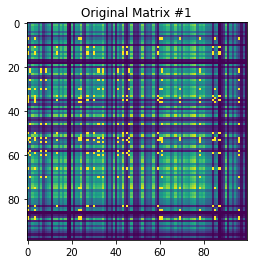

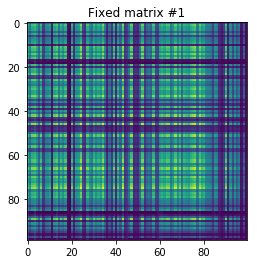

In [119]:
import pandas as pd
from sklearn.decomposition import PCA

corrMat1 = pd.read_csv('CorrMat1.csv')
corrMat3 = pd.read_csv('CorrMat3.csv')

print('Using PCA we can reduce the matrices to 1 dimension. This will eliminate outliers as PCA will capture')
print('capture as much of the variance of the data into this new data space\n')
print('To correct these entries, we can then recover the 100x100 matrix by reversing the PCA process on the 1 dimension data PCA originally created')

set1 = np.asarray(corrMat1)

print('\nLet us visualy create an image from the data. The yellow points are outliers.\n')
plt.title('Original Matrix #1')
plt.imshow(set1)
plt.show()

pca = PCA(n_components = 1)
set1_pca = pca.fit_transform(set1)
set1_fixed = pca.inverse_transform(set1_pca)

plt.title('Fixed matrix #1')
plt.imshow(set1_fixed)
plt.show()


Same process with matrix #3



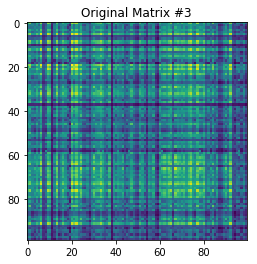

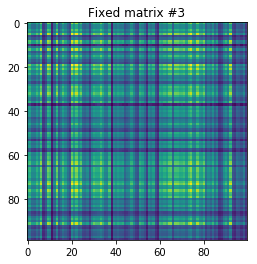

Here the outliers are harder to see but visually we can see that the outliers are distoring the image originally


In [121]:
print('Same process with matrix #3\n')
set3 = np.asarray(corrMat3)


plt.title('Original Matrix #3')
plt.imshow(set3)
plt.show()

pca = PCA(n_components = 1)
set3_pca = pca.fit_transform(set3)
set3_fixed = pca.inverse_transform(set3_pca)

plt.title('Fixed matrix #3')
plt.imshow(set3_fixed)
plt.show()

print('Here the outliers are harder to see but visually we can see that the outliers are distoring the image originally')

# Question 4

## 2. Ridge and Lass Regression with cross validation (K-fold with 5 folds)

In [105]:
import pandas as pd
import numpy as np
import sys
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from scipy.stats import skew

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

all_data = pd.get_dummies(all_data)

#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice


alphas =  np.logspace(3,-3,100)

params={'alpha': alphas}
ridge = Ridge()
cv_ridge = GridSearchCV(ridge,params,cv=5,verbose = 1, scoring = 'neg_mean_squared_error')
cv_ridge.fit(X_train, y)
lasso = Lasso()
cv_lasso = GridSearchCV(lasso,params,cv=5,verbose = 1, scoring = 'neg_mean_squared_error')
cv_lasso.fit(X_train, y)


best_ridge = cv_ridge.best_estimator_ 
best_lasso = cv_lasso.best_estimator_

preds = np.expm1(best_ridge.predict(X_test))

solution = pd.DataFrame({"id":test.Id, "SalePrice":preds})
solution.to_csv("best_ridge.csv", index = False)

preds = np.expm1(best_lasso.predict(X_test))

solution = pd.DataFrame({"id":test.Id, "SalePrice":preds})
solution.to_csv("best_lasso.csv", index = False)

print('Best score from Kaggle with Ridge: {} (Alpha = {})'.format(0.12224, 
                                                            cv_ridge.best_params_['alpha']))
print('Best score from Kaggle with Lasso: {} (Alpha = {})'.format(0.12096, 
                                                            cv_lasso.best_params_['alpha']))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    7.0s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best score from Kaggle with Ridge: 0.12224 (Alpha = 10.0)
Best score from Kaggle with Lasso: 0.12096 (Alpha = 0.001)


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    8.0s finished


## 3. L0 norm over alphas

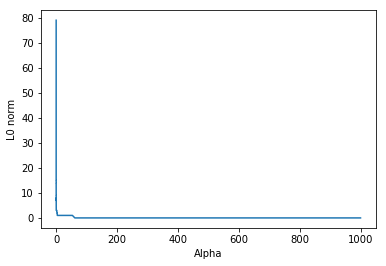

In [106]:
import matplotlib.pyplot as plt

def getL0Norm(coefficients):
    non_zeros = 0
    for coef in coefficients:
        if coef != 0:
            non_zeros += 1
    return non_zeros

l0 = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y)
    l0.append(getL0Norm(lasso.coef_))
plt.plot(alphas, l0)
plt.xlabel('Alpha')
plt.ylabel('L0 norm')
plt.show()

## 4. Ensembling and Stacking

In [80]:
y_train_ridge = best_ridge.predict(X_train)
y_train_lasso = best_lasso.predict(X_train)
X_train_cpy = X_train.copy()
X_train_cpy['Ridge'] = y_train_ridge
X_train_cpy['Lasso'] = y_train_lasso

y_test_ridge = best_ridge.predict(X_test)
y_test_lasso = best_lasso.predict(X_test)
X_test_cpy = X_test.copy()
X_test_cpy['Ridge'] = y_test_ridge
X_test_cpy['Lasso'] = y_test_lasso

stacked_ridge = Ridge(alpha=10.046165012825234)
stacked_ridge.fit(X_train_cpy, y)

preds = np.expm1(stacked_ridge.predict(X_test_cpy))

solution = pd.DataFrame({"id":test.Id, "SalePrice":preds})
solution.to_csv("stacked_ridge.csv", index = False)
print('Kaggle score: 0.12199')

Kaggle score: 0.12199


## 5. XGBoost

In [99]:
import xgboost as xgb

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             nthread=-1)
model_xgb.fit(X_train, y)
preds = np.expm1(model_xgb.predict(X_test))

solution = pd.DataFrame({"id":test.Id, "SalePrice":preds})
solution.to_csv("xgb.csv", index = False)
print('Kaggle score: 0.13329')

Kaggle score: 0.13329


## 6. Best score

In [101]:
lasso_pred = best_lasso.predict(X_test)
xgb_pred = model_xgb.predict(X_test)
final_pred = 0.5 * lasso_pred + 0.5 * xgb_pred

solution = pd.DataFrame({"id":test.Id, "SalePrice":preds})
solution.to_csv("final.csv", index = False)
print('Best kaggle score: 0.12096')

Best kaggle score: 0.12096
